In [22]:
import numpy as np # Linear algebra
import pandas as pd # data processing, csv, file (e.g. pd.read_csv)

print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

# It's so important which we use version when analiyzing.

Pandas version: 1.4.0
Numpy version: 1.22.1


In [23]:
df_IMDM = pd.read_csv("/Users/barborostasdemir/Desktop/Imdb Tv:web Series/TV Series.csv")

In [24]:
df_IMDM.head()

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
0,Wednesday,(2022– ),45 min,"Comedy, Crime, Fantasy",8.2,"Jenna Ortega, Hunter Doohan, Percy Hynes White...","Follows Wednesday Addams' years as a student, ..."
1,Yellowstone,(2018– ),60 min,"Drama, Western",8.7,"Kevin Costner, Luke Grimes, Kelly Reilly, Wes ...",A ranching family in Montana faces off against...
2,The White Lotus,(2021–2023),60 min,"Comedy, Drama",7.9,"Jennifer Coolidge, Jon Gries, F. Murray Abraha...","Set in a tropical resort, it follows the explo..."
3,1923,(2022–2023),60 min,"Drama, Western",8.6,"Harrison Ford, Helen Mirren, Brandon Sklenar, ...",The Duttons face a new set of challenges in th...
4,Jack Ryan,(2018– ),60 min,"Action, Drama, Thriller",8.0,"John Krasinski, Wendell Pierce, Michael Kelly,...","Up-and-coming CIA analyst, Jack Ryan, is thrus..."


In [25]:
df_IMDM.tail()

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
49995,Law & Order: Special Victims Unit,(1999– ),60 min,"Crime, Drama, Mystery",8.1,"Mariska Hargitay, Christopher Meloni, Ice-T, D...","This series follows the Special Victims Unit, ..."
49996,Doctor Who,(2005– ),45 min,"Adventure, Drama, Sci-Fi",8.6,"Jodie Whittaker, Peter Capaldi, Pearl Mackie, ...",The further adventures in time and space of th...
49997,The Lord of the Rings: The Rings of Power,(2022– ),****,"Action, Adventure, Drama",6.9,"Morfydd Clark, Ismael Cruz Cordova, Charlie Vi...",Epic drama set thousands of years before the e...
49998,The Bear,(2022– ),30 min,"Comedy, Drama",8.4,"Jeremy Allen White, Ebon Moss-Bachrach, Ayo Ed...",A young chef from the fine dining world return...
49999,Supernatural,(2005–2020),44 min,"Drama, Fantasy, Horror",8.4,"Jared Padalecki, Jensen Ackles, Jim Beaver, Mi...",Two brothers follow their father's footsteps a...


In [26]:
df_IMDM.shape
# The shape of an array is the number of elements in each dimension of the array.

(50000, 7)

In [27]:
df_IMDM.dtypes
# we are learning what data types are.

Series Title    object
Release Year    object
Runtime         object
Genre           object
Rating          object
Cast            object
Synopsis        object
dtype: object

In [28]:
df_IMDM.isnull().sum()
# we take the sum of null values.

Series Title      0
Release Year    200
Runtime           0
Genre             0
Rating            0
Cast             91
Synopsis          0
dtype: int64

# Data

##### Source: [IMDB - Analysis](https://www.kaggle.com/datasets/muralidharbhusal/50000-imdb-tv-and-web-series).

##### Content: 50,000 rows and 7 columns

##### Considerations
* All columns are of type "object"
 - Task:  Format columns names
* Some columns, like "Rating", were filled with "**" to represnet missing values.
  - Task: Replace "**" values to np.NaN or None 
* this  dataset has 403441 duplicated values if we consider that each series must appear only once
  - Task: Remove duplicate rows

Questions:
* How many series were relased in 2022?
* What is th most Popular genre 2022?
* What is the averga rating of 2022 drama series?

In [29]:
df_IMDM.sample(2) 
# it's brings randomly 2 piece value.

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
12094,Ted Lasso,(2020– ),30 min,"Comedy, Drama, Sport",8.8,"Jason Sudeikis, Brett Goldstein, Brendan Hunt,...",American college football coach Ted Lasso head...
4194,Big Swiss,NaN,****,Drama,****,Star:Jodie Comer,"The protagonist starts a new life in New York,..."


# Trasforming Data 

In [30]:
def gt_imdb_df(df: pd.DataFrame) -> pd.DataFrame: 
    return(
    df # Formatting column names (Series Title -> series_title

    .rename(columns=lambda column_:column_.lower().replace(" ","_"))
    # Replacing "****" values, converting column type and extracting relevant info

    .assign(rating=lambda df_: df_.rating.replace("****", np.NaN).astype("float32"),
    runtime=lambda df_: df_.runtime.replace("****", np.NaN).str.extract(r"(\d+) min").astype("float").astype("Int64"),
    end_year=lambda df_: df_.release_year.str.extract(r"-?(\d+)\)").astype("float").astype("Int64"),
                release_year=lambda df_: df_.release_year.str.extract(r"\((\d+)–?").astype("float").astype("Int64"))
        # Dropping series without release year
        .dropna(subset=["release_year"])
        # Dropping duplicated rows
        .drop_duplicates(subset="series_title")
)



In [31]:
transformed_imdb_df = gt_imdb_df(df_IMDM)

In [32]:
transformed_imdb_df.sample(5)

,series_title,release_year,runtime,genre,rating,cast,synopsis,end_year
7137,Hip-Hop Evolution,2016,90,"Documentary, Music",8.4,"Shad, LL Cool J, Alonzo Williams, Melle Mel",MC and journalist Shad Kabango meets with Hip-...,<NA>
7061,Transufômâ: Maikuron densetsu,2002,30,"Action, Animation, Adventure",7.0,"Garry Chalk, David Kaye, Kirby Morrow, Scott M...",The Autobots and the Decepticons are going at ...,2003
7080,Vampire: The Masquerade: L.A. By Night,2018,<NA>,Horror,8.8,"Cynthia Marie, Alexander Ward, B. Dave Walters...",Led by Storyteller Jason Carl of White Wolf En...,<NA>
2201,Jett,2019,60,"Crime, Drama, Thriller",7.4,"Carla Gugino, Elena Anaya, Michael Aronov, Gai...","World-class thief Daisy ""Jett"" Kowalski is jus...",2019
4467,Nanny and the Professor,1970,30,"Comedy, Fantasy",7.2,"Juliet Mills, Richard Long, David Doremus, Tre...",A remarkable young English nanny takes over th...,1971


In [33]:
df_IMDM.sort_values(["Rating"], axis=0,ascending=[False],inplace=True)
df_IMDM.head(10)

,Series Title,Release Year,Runtime,Genre,Rating,Cast,Synopsis
2790,His Dark Materials,(2003),****,"Adventure, Drama, Fantasy",9.7,"Terence Stamp, Kenneth Cranham, Bill Paterson,...",A young girl sets out on a quest that takes he...
8134,Roadworthy Rescues,(2022– ),****,****,9.6,"Derek Bieri, Jessica Bieri, Dan Dosemagen, Car...",Follow Derek Bieri as he seeks out abandoned c...
9173,Dallyeola Bangtan!,(2015– ),****,Game-Show,9.6,"RM, V, Jin, Jimin",Run BTS (Dallyeola Bangtan!) is a South Korean...
202,Bluey,(2018– ),7 min,"Animation, Family",9.6,"David McCormack, Melanie Zanetti, Ninthe van S...",The slice-of-life adventures of an Australian ...
16621,Breaking Bad,(2008–2013),49 min,"Crime, Drama, Thriller",9.5,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",A chemistry teacher diagnosed with inoperable ...
40021,Breaking Bad,(2008–2013),49 min,"Crime, Drama, Thriller",9.5,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",A chemistry teacher diagnosed with inoperable ...
29721,Breaking Bad,(2008–2013),49 min,"Crime, Drama, Thriller",9.5,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",A chemistry teacher diagnosed with inoperable ...
47071,Breaking Bad,(2008–2013),49 min,"Crime, Drama, Thriller",9.5,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",A chemistry teacher diagnosed with inoperable ...
10921,Breaking Bad,(2008–2013),49 min,"Crime, Drama, Thriller",9.5,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",A chemistry teacher diagnosed with inoperable ...
29671,Breaking Bad,(2008–2013),49 min,"Crime, Drama, Thriller",9.5,"Bryan Cranston, Aaron Paul, Anna Gunn, Betsy B...",A chemistry teacher diagnosed with inoperable ...


In [34]:
First_ten_imdm=df_IMDM.head(10)

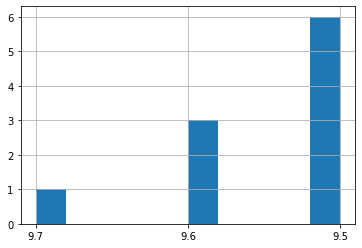

In [35]:
First_ten_imdm["Rating"].hist();

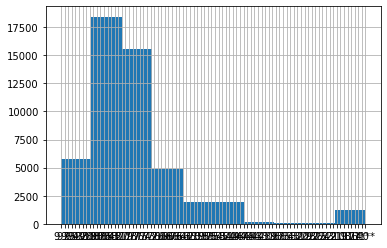

In [36]:
df_IMDM["Rating"].hist();

In [37]:
first_runtime = df_IMDM.head()

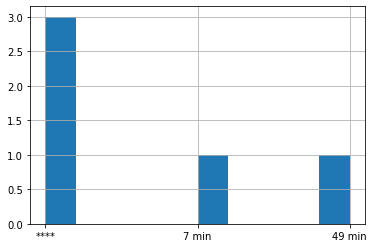

In [38]:
first_runtime["Runtime"].hist();

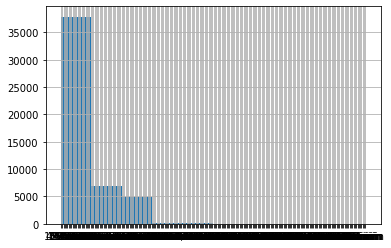

In [39]:
df_IMDM["Runtime"].hist();

In [40]:
df_IMDM["Rating"].unique()

array(['9.7', '9.6', '9.5', '9.4', '9.3', '9.2', '9.1', '9.0', '8.9',
       '8.8', '8.7', '8.6', '8.5', '8.4', '8.3', '8.2', '8.1', '8.0',
       '7.9', '7.8', '7.7', '7.6', '7.5', '7.4', '7.3', '7.2', '7.1',
       '7.0', '6.9', '6.8', '6.7', '6.6', '6.5', '6.4', '6.3', '6.2',
       '6.1', '6.0', '5.9', '5.8', '5.7', '5.6', '5.5', '5.4', '5.3',
       '5.2', '5.1', '5.0', '4.9', '4.8', '4.7', '4.6', '4.5', '4.4',
       '4.3', '4.2', '4.1', '4.0', '3.9', '3.8', '3.7', '3.6', '3.5',
       '3.4', '3.3', '3.2', '3.1', '3.0', '2.9', '2.8', '2.7', '2.6',
       '2.5', '2.4', '2.3', '2.2', '2.1', '2.0', '1.9', '1.8', '1.7',
       '1.6', '1.4', '1.1', '1.0', '****'], dtype=object)

In [41]:
df_IMDM["Runtime"].unique()

array(['****', '7 min', '49 min', '125 min', '59 min', '60 min',
       '160 min', '45 min', '54 min', '1 min', '23 min', '22 min',
       '40 min', '30 min', '67 min', '57 min', '55 min', '25 min',
       '10 min', '180 min', '24 min', '90 min', '52 min', '51 min',
       '80 min', '88 min', '70 min', '240 min', '95 min', '44 min',
       '26 min', '47 min', '20 min', '41 min', '8 min', '46 min',
       '42 min', '35 min', '53 min', '5 min', '11 min', '43 min',
       '28 min', '175 min', '66 min', '3 min', '9 min', '84 min',
       '50 min', '12 min', '58 min', '15 min', '75 min', '92 min',
       '72 min', '2 min', '29 min', '150 min', '27 min', '120 min',
       '89 min', '100 min', '176 min', '21 min', '65 min', '6 min',
       '56 min', '62 min', '85 min', '159 min', '63 min', '105 min',
       '33 min', '13 min', '402 min', '32 min', '4 min', '491 min',
       '325 min', '48 min', '69 min', '207 min', '469 min', '561 min',
       '480 min', '900 min', '39 min', '853 min', '217 m

# Answering the questions

In [45]:
print(f"how many series were relased in 2022? { transformed_imdb_df.release_year.eq(2022).sum()}")

q2_query = (
    transformed_imdb_df
    .query("release_year == 2022")
    .genre.str
    .split(", ")
    .explode()
    .value_counts()
    .index[0]
)

print(f"What is the most popular genre in 2022? { q2_query} ")

q3_query = (
    transformed_imdb_df
    .query("release_year == 2022 & 'Drama' in genre")
    .rating
    .mean()
)

print(f"What is the average rating of 2022 drama series{q3_query:.1f}")

how many series were relased in 2022? 1140
What is the most popular genre in 2022? Drama 
What is the average rating of 2022 drama series7.1
